#**HOME CREDIT SCORE CARD MODEL**



#EDA

**Introduction**

Perusahaan Pemberi kredit atau pinjam meminjam membutuhkan analisa awal apakah nasabah yang akan dibiayai mempunyai kemungkinan pembayaran kredit/pinjaman bermasalah atau tidak.
Hal tersebut dilakukan perusahaan untuk menghindari kerugian dan mendatangkan keuntungan besar.


Pada Dataset ini kita akan melakukan modeling data dari Perusahaan Home Credit.






**Problem**

Bagaimana membuat model yang dapat memprediksi kemampuan pembayaran Pelanggan sehingga dapat membantu tim menentukan pinjaman yang diajukan diterima atau ditolak, kemudian dapat memaksimalkan target pasar selanjutnya.

**Import library**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

**Read the Data**

In [ ]:
application_train = pd.read_csv('/content/application_train.csv')

In [ ]:
print(application_train.shape)

(307511, 122)


In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

**Data Types**

In [ ]:
print('Data types: \n')
application_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

**Jumlah nasabah yang mengajukan pinjaman**

In [ ]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

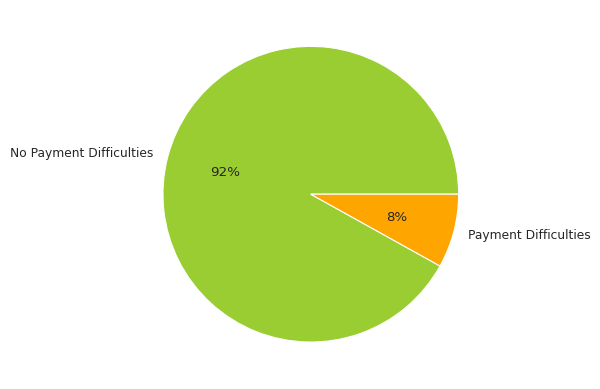

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax =plt.subplots()

_ = ax.pie(x = application_train.TARGET.value_counts(), 
           labels=['No Payment Difficulties','Payment Difficulties'], 
           colors=['yellowgreen', 'orange'],autopct='%.0f%%')


plt.show()

**Categorical Features Vs Target**

**Contract Type**

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

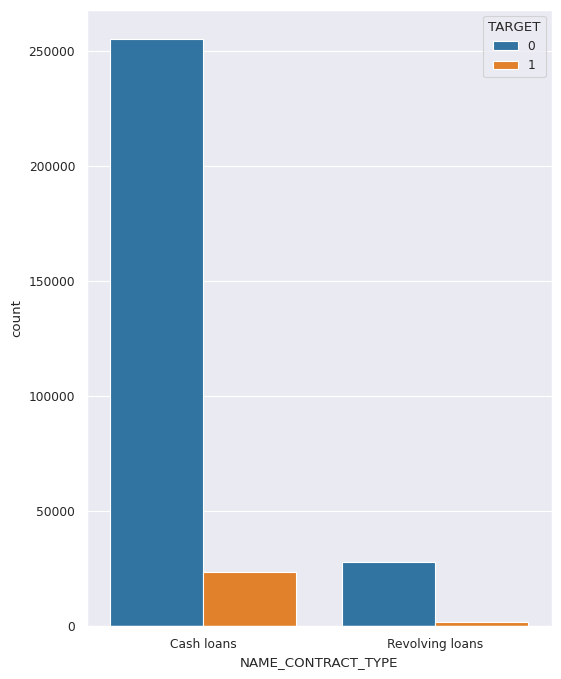

In [ ]:
# visualization_1
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1, figsize=(6,8))
sns.set_context('paper', font_scale=1)


sns.countplot(x='NAME_CONTRACT_TYPE', data = application_train, hue = 'TARGET')




In [ ]:
ct = application_train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Reds')

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,255011
1,Cash loans,1,23221
2,Revolving loans,0,27675
3,Revolving loans,1,1604


Persentase pelanggan yang memiliki masalah untuk membayar pada cash loans lebih tinggi dibanding Revolving loans dan dapat dilihat bahwa cash loans lebih banyak diambil daripada Revolving loans.

**Marital status**

In [ ]:
application_train.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
fS = application_train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
fS.sort_values(by='SK_ID_CURR', ascending=False)
fS.style.background_gradient(cmap='Reds')

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,0,26814
1,Civil marriage,1,2961
2,Married,0,181582
3,Married,1,14850
4,Separated,0,18150
5,Separated,1,1620
6,Single / not married,0,40987
7,Single / not married,1,4457
8,Unknown,0,2
9,Widow,0,15151


<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

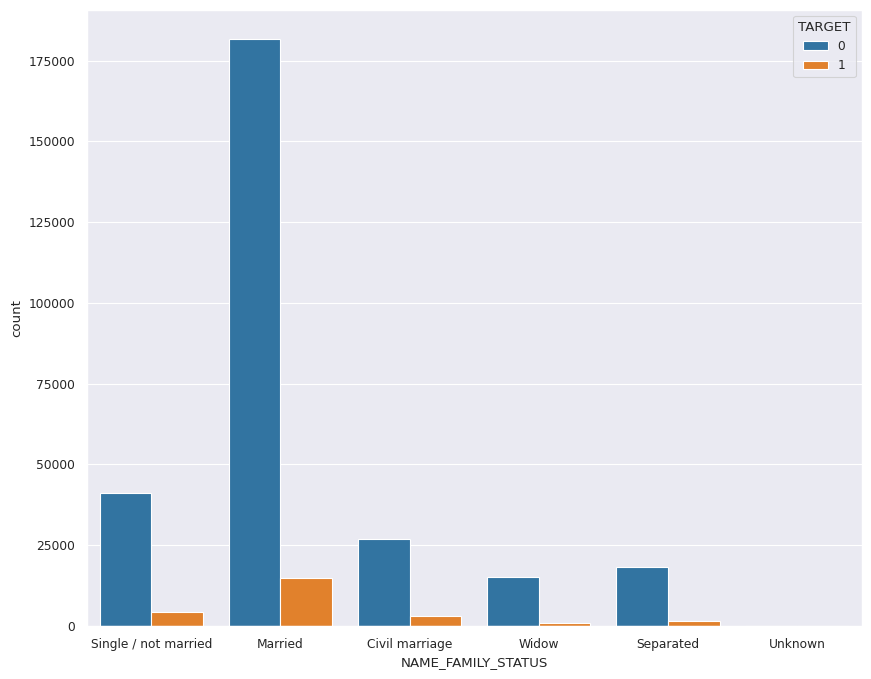

In [ ]:
# visualization_2
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.set_context('paper', font_scale=1)


sns.countplot(x='NAME_FAMILY_STATUS', data = application_train, hue = 'TARGET')



Untuk fitur status keluarga, kita melihat lebih banyak pinjaman yang diambil oleh mereka yang menikah & status menikah lebih banyak gagal bayar (bermasalah)

**Gender**

<Axes: xlabel='CODE_GENDER', ylabel='count'>

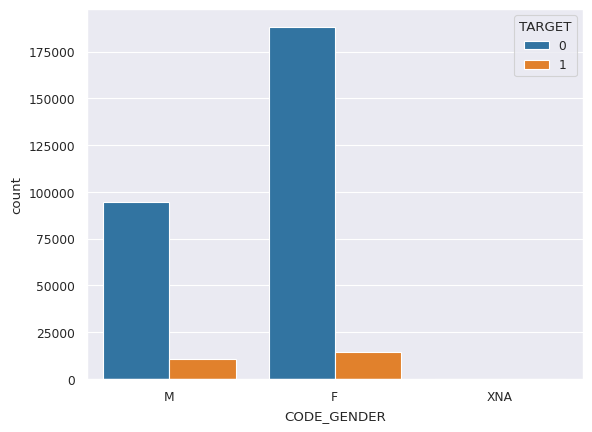

In [ ]:
sns.countplot(x='CODE_GENDER', data = application_train, hue = 'TARGET')

In [ ]:
application_train['CODE_GENDER'] = application_train['CODE_GENDER'].replace(['F','M'],['Female','Male'])
gt = application_train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
gt.sort_values(by='SK_ID_CURR', ascending=False)
gt.style.background_gradient(cmap='Reds')

,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,0,188278
1,Female,1,14170
2,Male,0,94404
3,Male,1,10655
4,XNA,0,4


In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Total': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Total",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

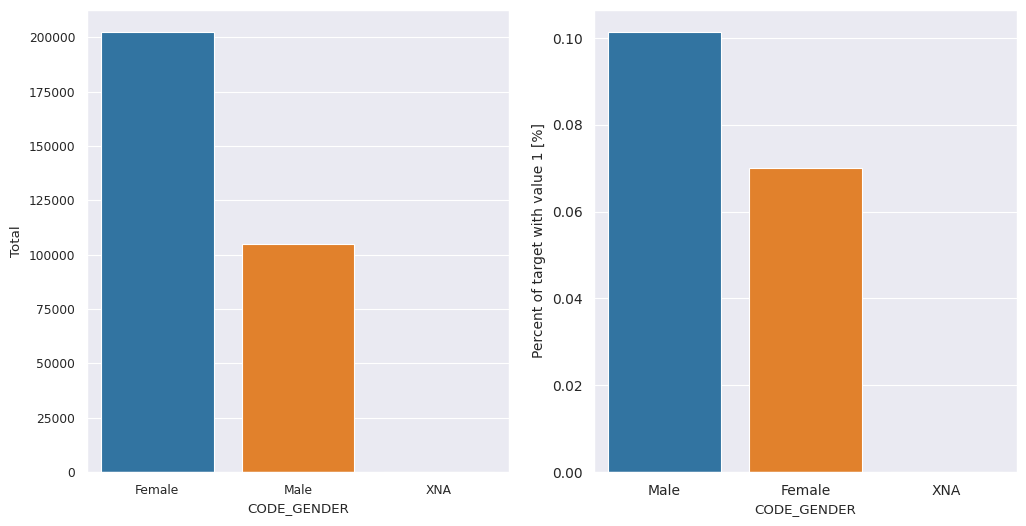

In [ ]:
plot_stats('CODE_GENDER')

Jumlah pelanggan wanita hampir dua kali lipat jumlah pelanggan pria. namun,dilihat dari persentase kredit macet, laki-laki memiliki peluang lebih tinggi untuk tidak mengembalikan pinjaman mereka.

**FLAG_OWN_CAR**

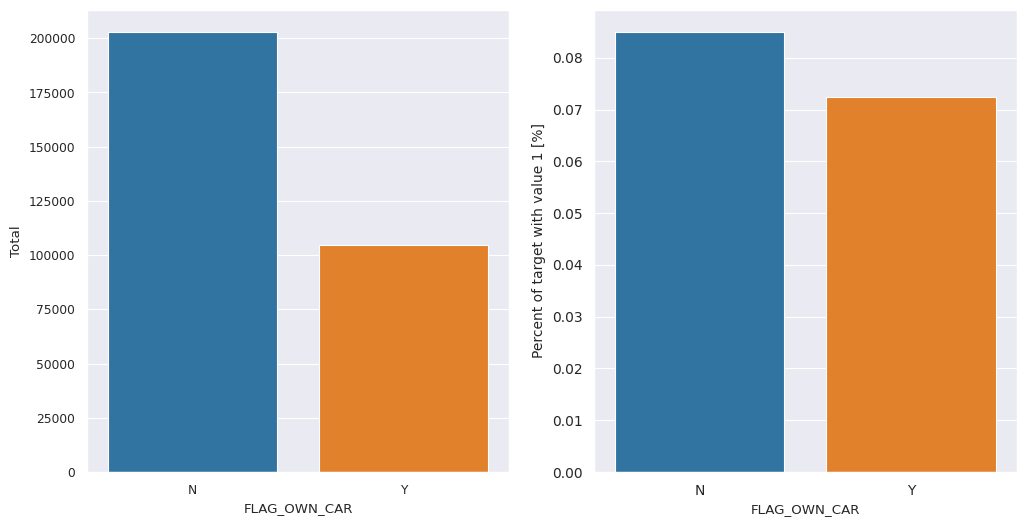

In [ ]:
plot_stats('FLAG_OWN_CAR')


Untuk fitur FLAG_OWN_CAR, ternyata lebih banyak pinjaman yang diambil oleh mereka yang tidak memiliki mobil dan mereka juga lebih banyak yang gagal bayar.

**FLAG_OWN_REALTY**

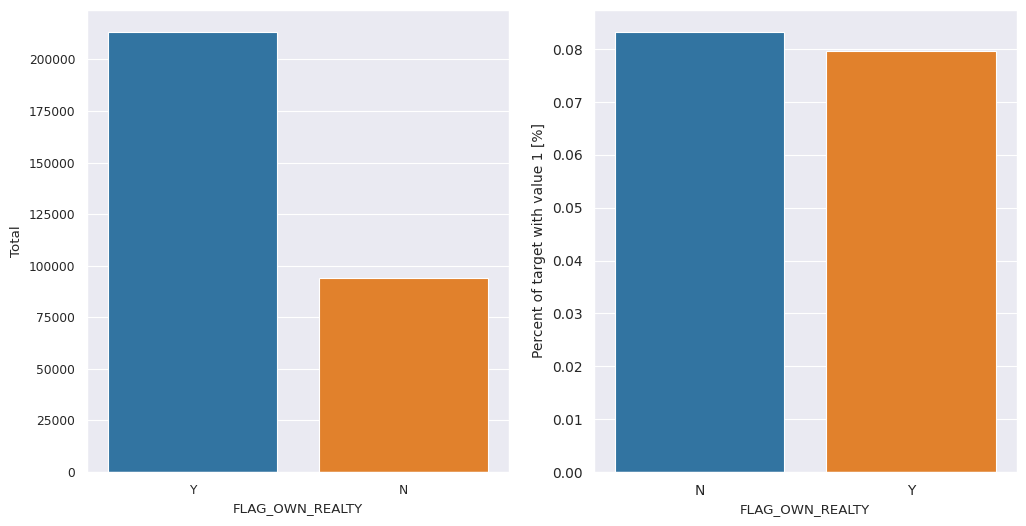

In [ ]:
plot_stats('FLAG_OWN_REALTY')

Untuk fitur FLAG_OWN_REALTY,  lebih banyak pinjaman yang diambil oleh mereka yang mereka yang memiliki realti dan yang gagal bayar sedikit lebih banyak oleh mereka yang tidak memiliki realti.

**NAME_TYPE_SUITE**

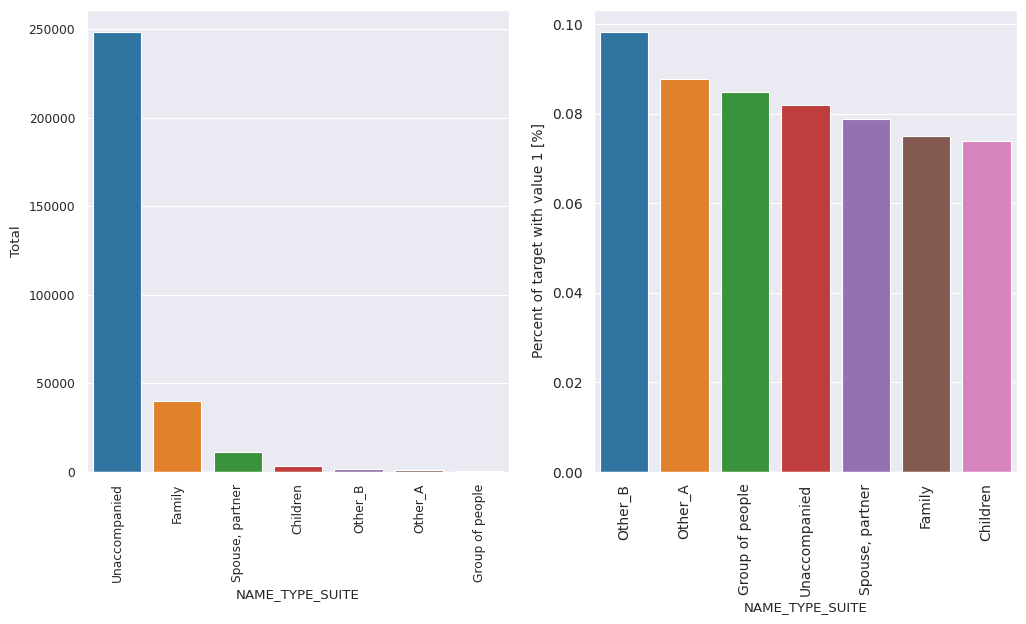

In [ ]:
plot_stats('NAME_TYPE_SUITE',True, True)

Sebagian besar pelanggan tidak ditemani saat mengajukan pinjaman. Dalam persentase pinjaman yang gagal bayar pelanggan yang didampingi oleh Other_B dan Other_A memiliki persentase yang tinggi.

**NAME_INCOME_TYPE**

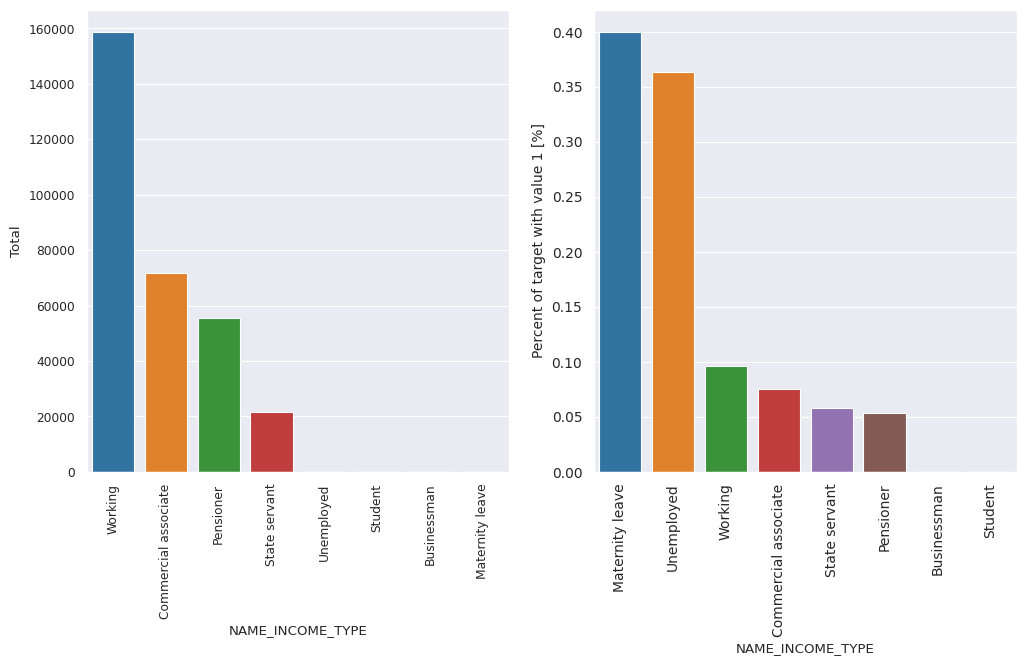

In [ ]:
plot_stats('NAME_INCOME_TYPE',True,True)

Sebagian besar pelanggan adalah yang berpenghasilan dari Bekerja, diikuti oleh Mitra Usaha, Pensiunan dan Pegawai Negeri Sipil.

Pelanggan dengan jenis penghasilan Cuti melahirkan memiliki persentase tidak mengembalikan pinjaman hampir 40%, diikuti oleh Pengangguran (37%). Jenis pendapatan lainnya berada di bawah rata-rata 10%.

**NAME_EDUCATION_TYPE**

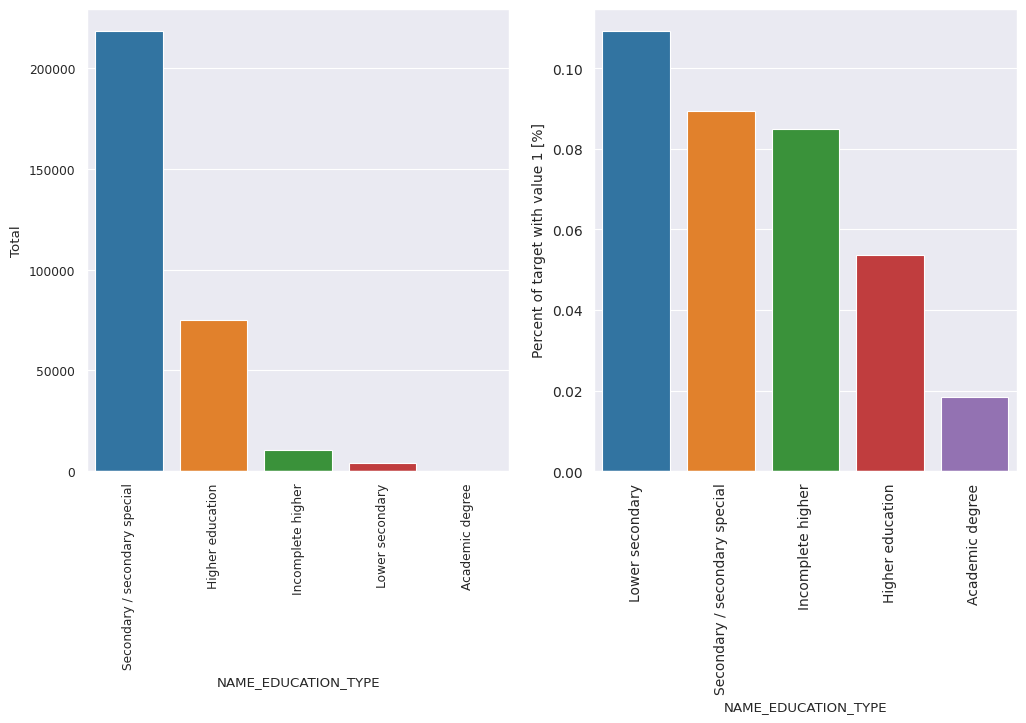

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

Mayoritas pelanggan berpendidikan menengah/menengah khusus, diikuti oleh pelanggan berpendidikan tinggi.

Kategori menengah bawah meskipun sedikit , memiliki tingkat tidak mengembalikan pinjaman terbesar (11%).

**CNT_CHILDREN**

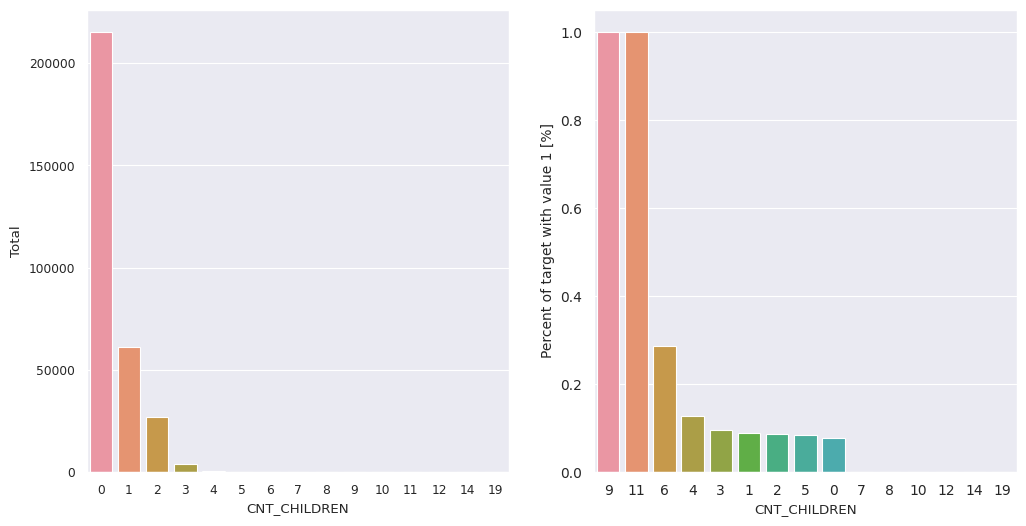

In [ ]:
plot_stats('CNT_CHILDREN')

Untuk fitur jumlah anak, kita dapat lihat bahwa ada lebih banyak pinjaman yang diambil oleh mereka yang memiliki anak lebih sedikit (tertinggi oleh pelanggan yang tidak memiliki anak) dan yang tidak mengembalikan pinjaman mereka yang memiliki lebih banyak anak (tertinggi sebanyak 100% oleh pelanggan yang memiliki anak berjumlah 9)

**CNT_FAM_MEMBERS**

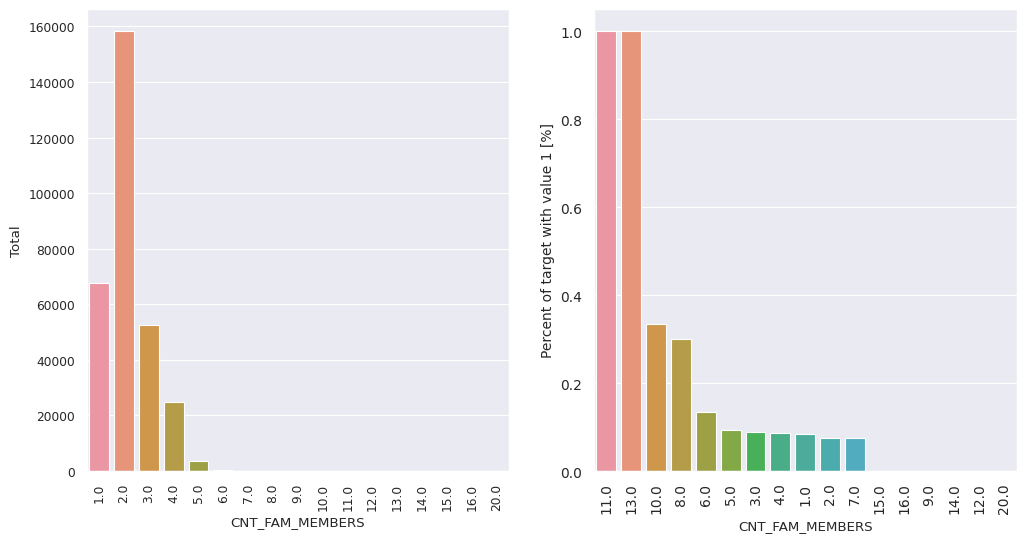

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

Untuk fitur jumlah anggota keluarga, kita melihat bahwa ada lebih banyak pinjaman yang diambil oleh mereka yang memiliki anggota keluarga lebih sedikit dan yang tidak mengembalikan pinjaman lebih banyak dari mereka yang memiliki lebih banyak anggota.


**OCCUPATION_TYPE**

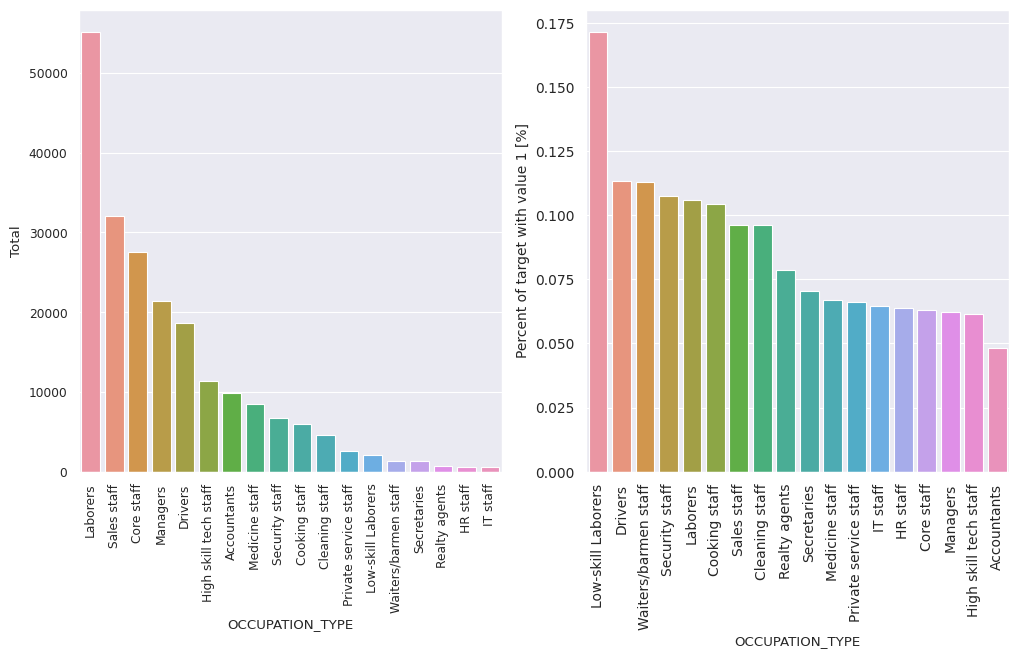

In [ ]:
plot_stats('OCCUPATION_TYPE',True, True)

Sebagian besar pinjaman diambil oleh Buruh, diikuti oleh sales staff, core staff dan terendah oleh IT staff.

Kategori dengan persentase yang tidak mengembalikan pinjaman  tertinggi adalah Tenaga Kerja Keterampilan Rendah (di atas 17%), diikuti oleh waiters dan HR staff.

**ORGANIZATION_TYPE**

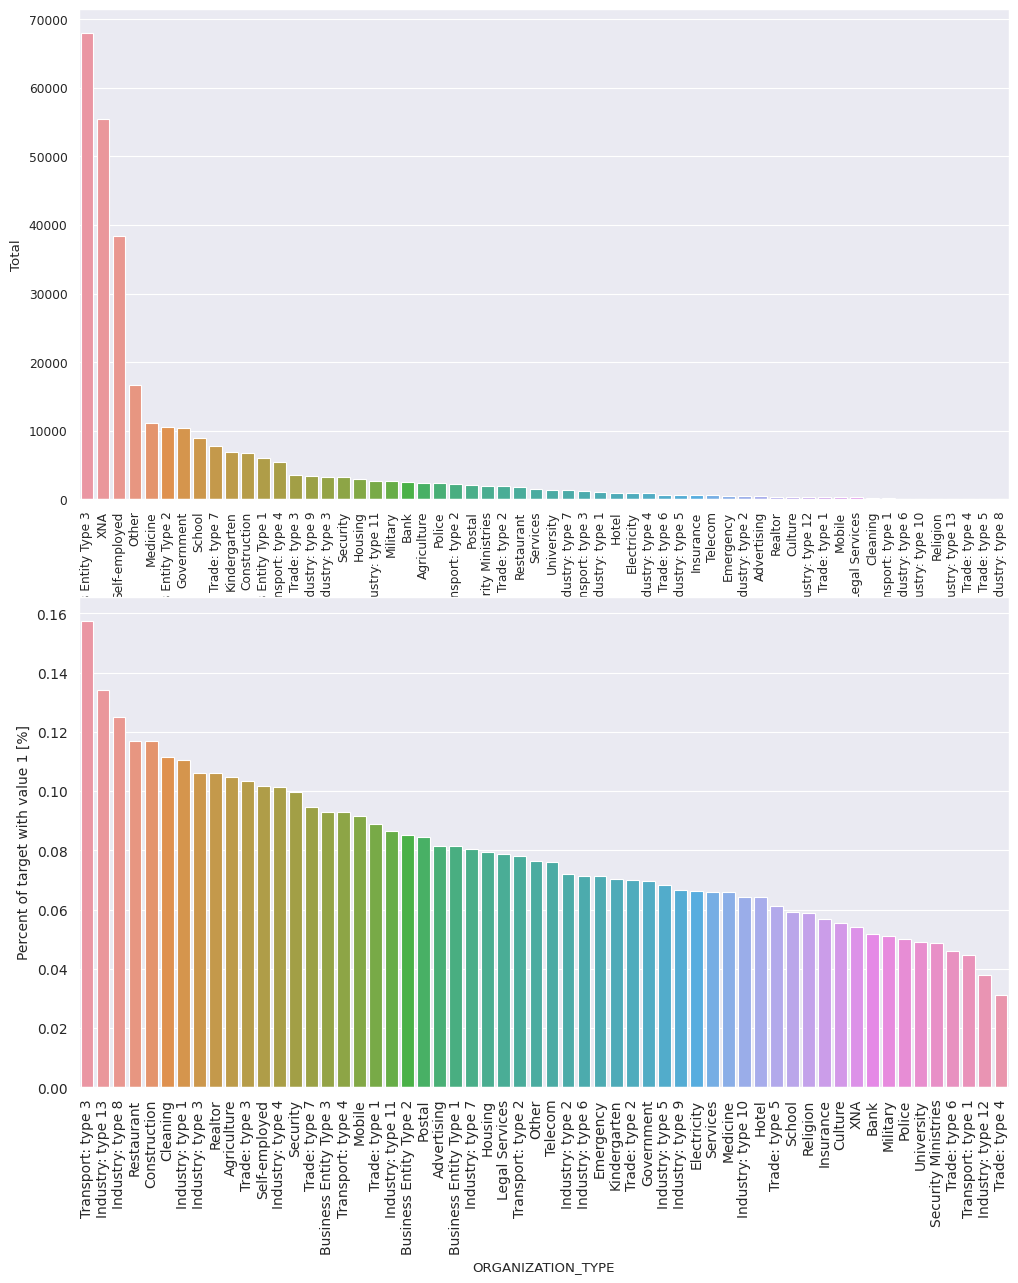

In [ ]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organisasi dengan persentase pinjaman yang tidak dilunasi tertinggi adalah Industri: tipe 13

**NAME_HOUSING_TYPE**

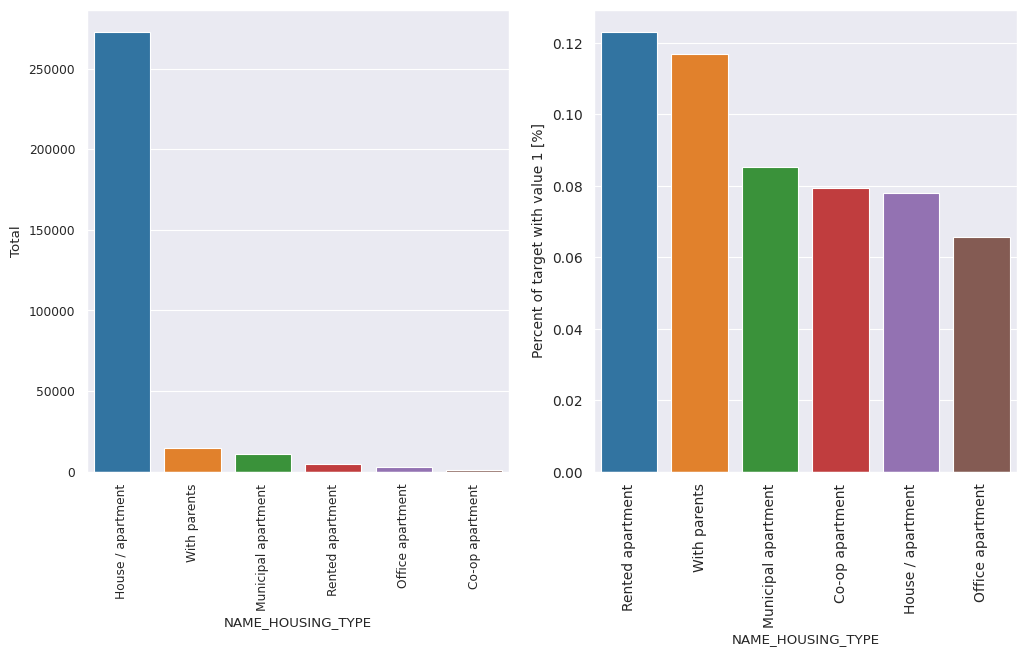

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

Untuk fitur tipe rumah, kita melihat lebih banyak pinjaman yang diambil oleh mereka yang memiliki rumah/apartemen dan lebih banyak yang tidak mengembalikan pinjaman dari mereka yang tinggal bersama orang tua diikuti telah menyewa apartemen.

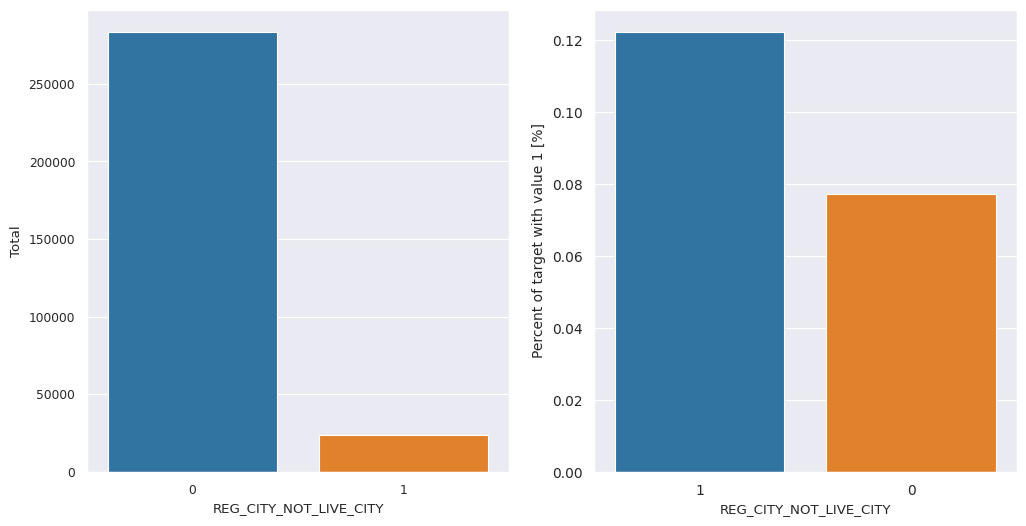

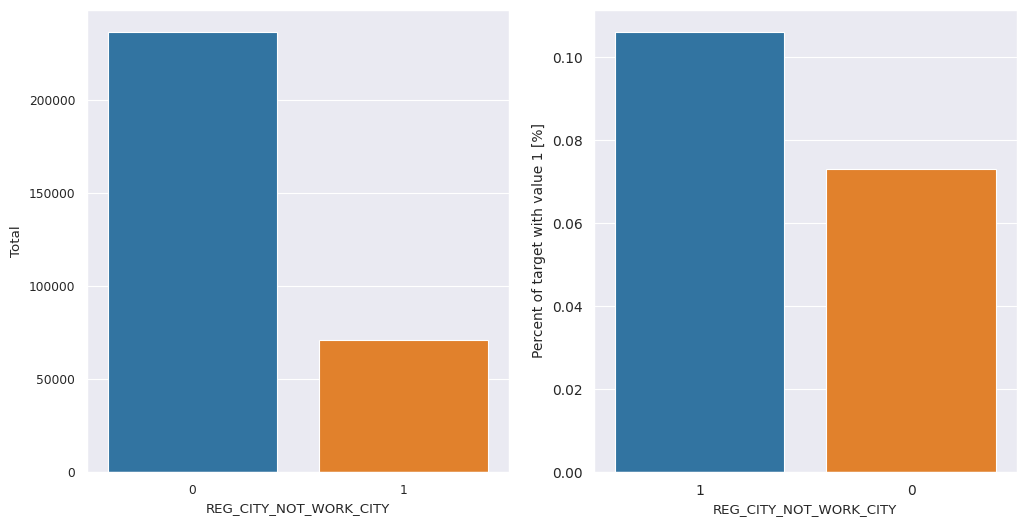

In [ ]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Secara umum, lebih banyak orang yang mendaftar di kota tempat mereka tinggal atau bekerja 

Mereka yang mendaftar di kota yang berbeda dari kota tempat tinggal atau bekerja lebih sering tidak membayar kembali pinjamannya daripada mereka yang mendaftar di kota yang sama (bekerja 11% atau tinggal 12%).

**REG_REGION_NOT_LIVE_REGION**

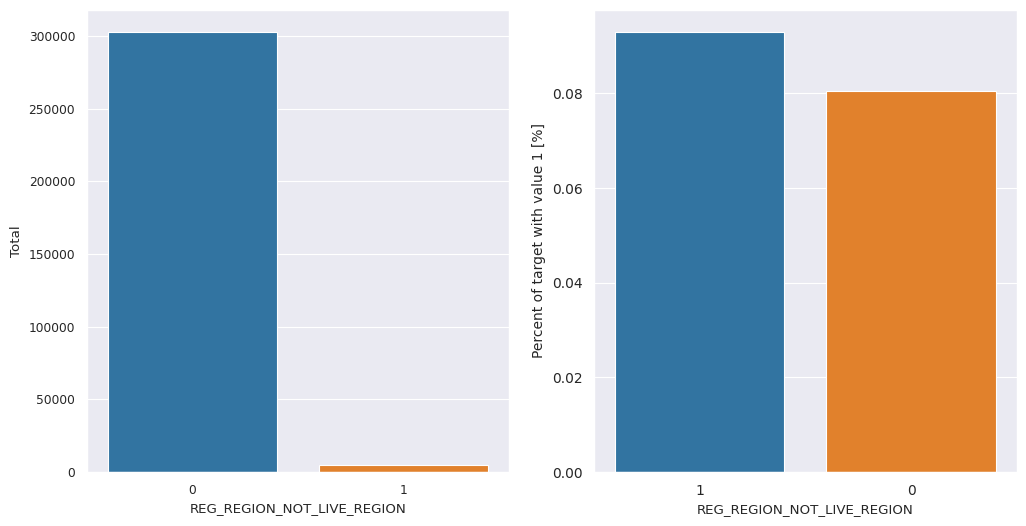

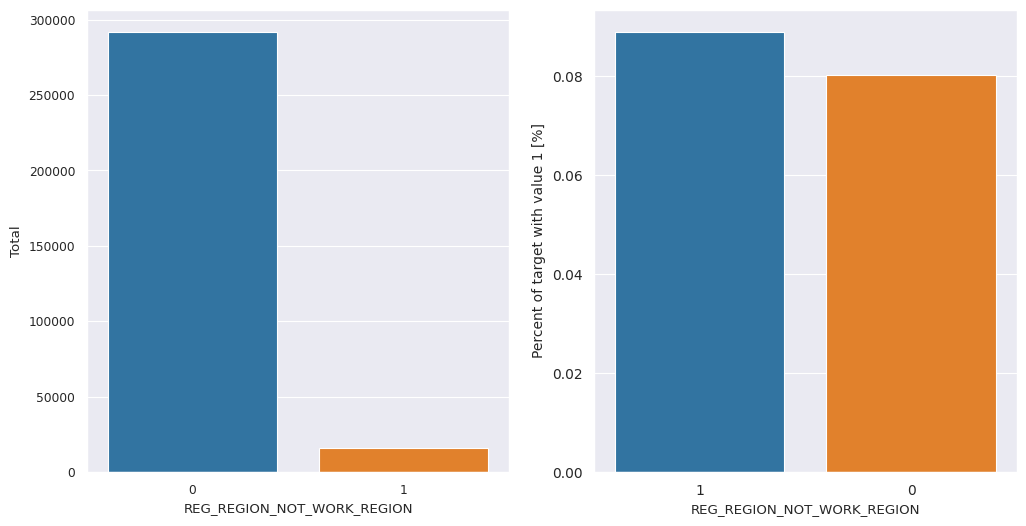

In [ ]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Untuk fitur, region not work region, kita melihat bahwa ada lebih banyak pinjaman yang diambil oleh mereka yang bekerja di wilayah yang sama dan yang tidak mengembalikan pinjaman dari mereka yang tidak bekerja di wilayah yang sama.

**Numerical Features Vs Target**

**AMT_INCOME_TOTAL**

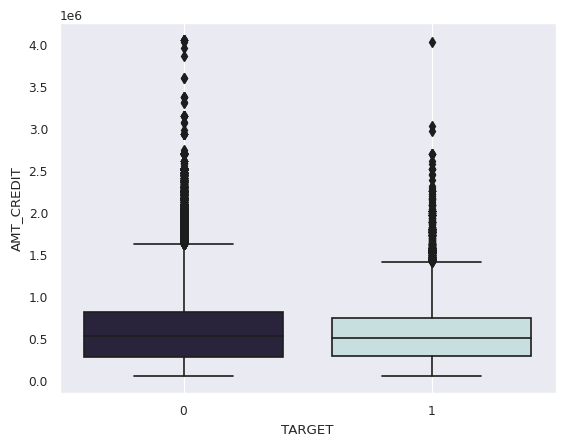

In [ ]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_train, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Terlihat bahwa nilai median jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih besar dibandingkan dengan nilai median nasabah yang mengalami kesulitan pembayaran. 

**Amount Income**

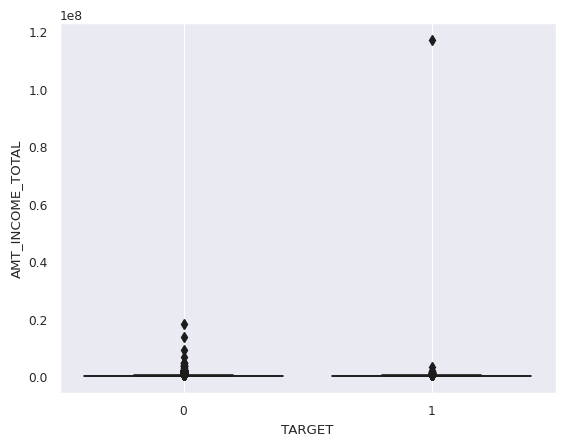

In [ ]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_train, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Terlihat bahwa baik pelanggan yang mengalami kesulitan pembayaran maupun pelanggan yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. 

**Age**

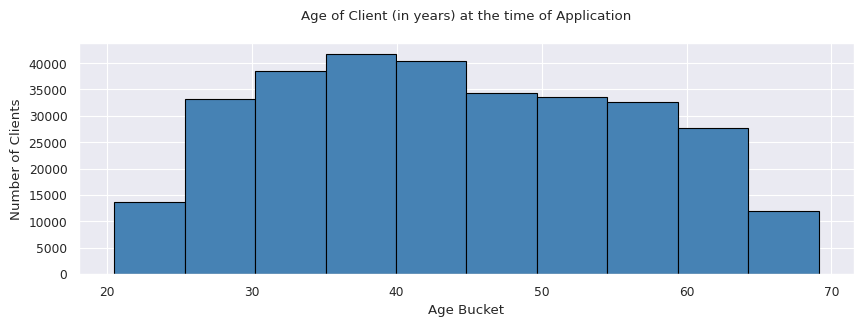

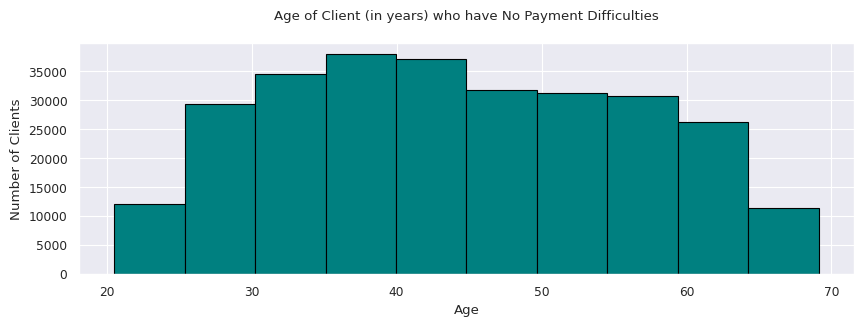

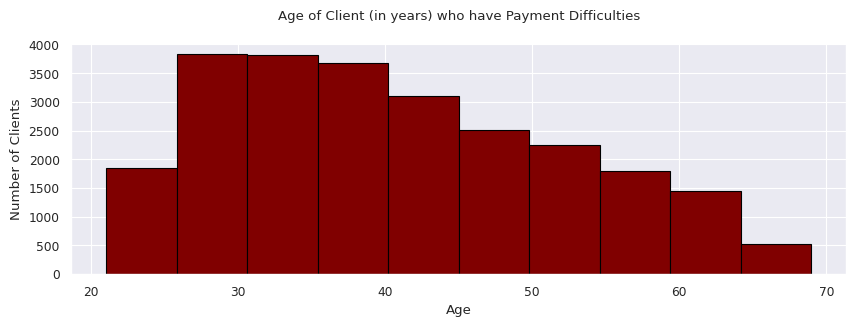

In [ ]:
no_age = application_train[application_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = application_train[application_train['TARGET']==1]['DAYS_BIRTH'].values/-365
plt.figure(figsize=(10,3))
plt.hist(application_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Dari grafik di atas terlihat bahwa pada umur 35-50 tahun merupakan kategori usia yang memiliki pengajuan pinjaman terbesar dan memiliki pinjaman lunas tanpa mengalami kendala apapun.

#Data Cleaning

Cek data duplikasi

In [ ]:
print('The number of duplication is:', application_train.duplicated().sum())


The number of duplication is: 0


In [ ]:

print('Missing values status:', application_train.isnull().values.any())
nvc = pd.DataFrame(application_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/application_train.shape[0])*100
nvc[nvc['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

Missing values status: True


,Total Null Values,Percentage
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [ ]:

application_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [ ]:
categorical_vars = [var for var in application_train.columns if application_train[var].isnull().mean()>0 and
                   application_train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
numeric_vars=nvc.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AV

In [ ]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler


In [ ]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [ ]:
# one-hot encoding of categorical variables
base_case_train = pd.get_dummies(application_train)

In [ ]:
# Drop the SK_ID from the training data
skid_temp = application_train['SK_ID_CURR']
train = base_case_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
base_case_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', base_case_train.shape)

Data shape:  (307511, 245)


**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in base_case_train.columns:
	if base_case_train[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	base_case_train[column] = LabelEncoder().fit_transform(base_case_train[column])
print(base_case_train.describe())

<ipython-input-493-9f7575dc19bc>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if base_case_train[column].dtype == np.number: continue


              TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT  \
count  307511.000000  307511.000000     307511.000000  307511.000000   
mean        0.080729       0.021950          0.001224       0.138334   
std         0.272419       0.038006          0.002027       0.100497   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.000000       0.000000          0.000742       0.056180   
50%         0.000000       0.000000          0.001039       0.116987   
75%         0.000000       0.052632          0.001512       0.190674   
max         1.000000       1.000000          1.000000       1.000000   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307511.000000    307511.000000               307511.000000   
mean        0.099423         0.124159                    0.284944   
std         0.056525         0.092103                    0.191521   
min         0.000000         0.000000                    0.000000   
25%   

**Data Spliting**

In [ ]:
x = base_case_train.drop(columns = 'TARGET')
y = base_case_train['TARGET']

**Oversampling**

In [ ]:
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x, y.ravel())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2)

**Undersampling**

In [ ]:
rus = RandomUnderSampler(random_state=2)
x_under, y_under = rus.fit_resample(x, y.ravel())
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_under, y_under, test_size=0.3, random_state=2)

# Modeling

**Logistic Regression Model**

In [ ]:
# train the model with oversampling
log_model = LogisticRegression().fit(x_train, y_train)
print(log_model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# predict data train
y_train_pred_log = log_model.predict(x_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70    198088
         1.0       0.70      0.72      0.71    197672

    accuracy                           0.71    395760
   macro avg       0.71      0.71      0.71    395760
weighted avg       0.71      0.71      0.71    395760



In [ ]:
# train the model with undersampling
log_model2 = LogisticRegression().fit(x_train2, y_train2)
print(log_model2)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# predict data train
y_train_pred_log2 = log_model2.predict(x_train2)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train2, y_train_pred_log2))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68     17398
         1.0       0.68      0.67      0.68     17357

    accuracy                           0.68     34755
   macro avg       0.68      0.68      0.68     34755
weighted avg       0.68      0.68      0.68     34755



*menggunakan oversampling

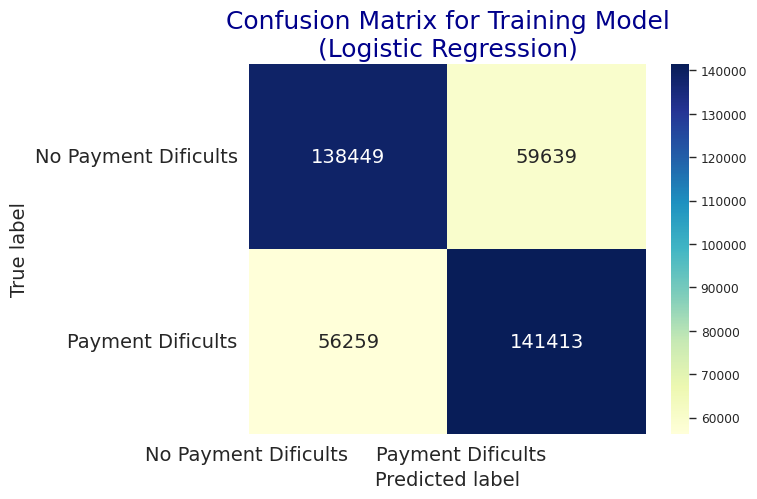

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Dificults', 'Payment Dificults'), ('No Payment Dificults', 'Payment Dificults'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
#Performansi Data Testing

from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70     84598
         1.0       0.70      0.71      0.71     85014

    accuracy                           0.71    169612
   macro avg       0.71      0.71      0.71    169612
weighted avg       0.71      0.71      0.71    169612



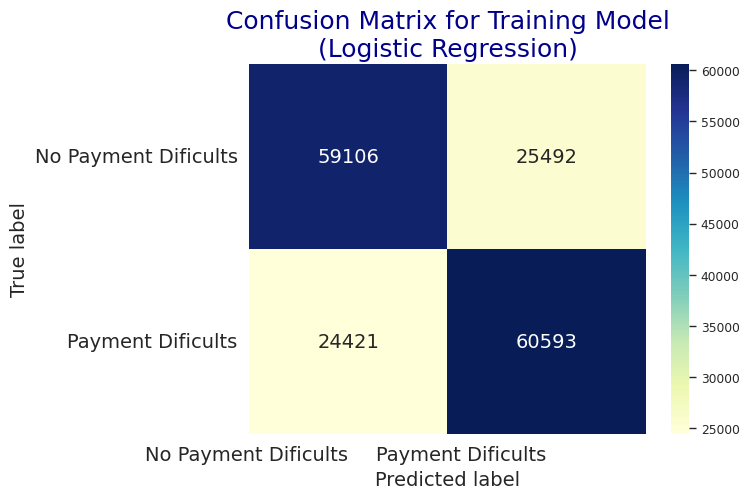

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Payment Dificults', 'Payment Dificults'), ('No Payment Dificults', 'Payment Dificults'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df2, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [ ]:
#Performa Data Training
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    198088
         1.0       1.00      1.00      1.00    197672

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



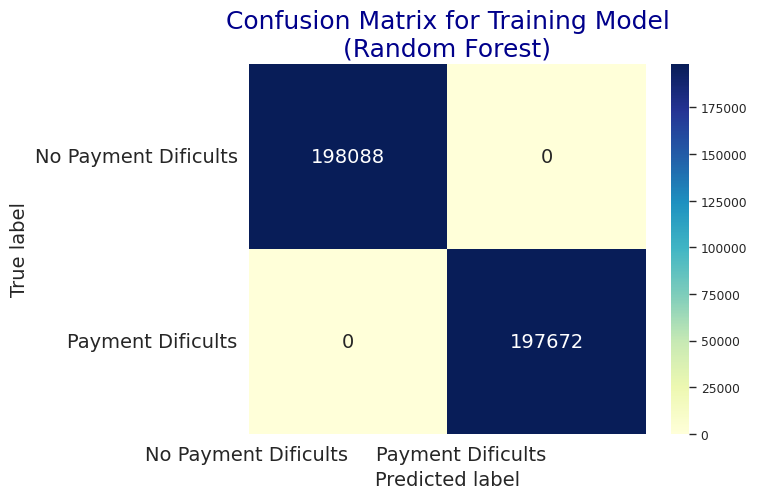

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df3 = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Payment Dificults', 'Payment Dificults'), ('No Payment Dificults', 'Payment Dificults'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df3, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
#Performa Data Test

from sklearn.metrics import classification_report
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
     

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84598
         1.0       1.00      0.91      0.95     85014

    accuracy                           0.95    169612
   macro avg       0.96      0.95      0.95    169612
weighted avg       0.96      0.95      0.95    169612



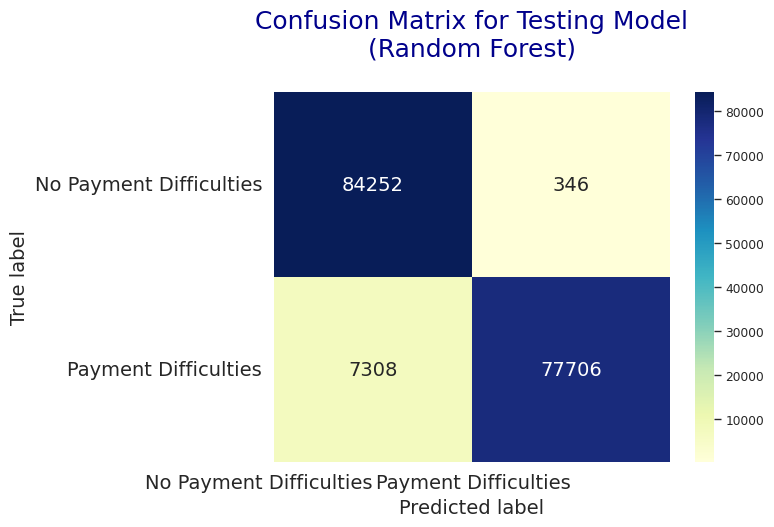

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df3 = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties')) 

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df3, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()